In [21]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_profiling
import scipy.stats as stats
%matplotlib inline

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.formula.api as sm

In [33]:
data = pd.read_excel('Data Set.xlsx')
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [34]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 130 columns):
custid               5000 non-null object
region               5000 non-null int64
townsize             4998 non-null float64
gender               5000 non-null int64
age                  5000 non-null int64
agecat               5000 non-null int64
birthmonth           5000 non-null object
ed                   5000 non-null int64
edcat                5000 non-null int64
jobcat               5000 non-null int64
union                5000 non-null int64
employ               5000 non-null int64
empcat               5000 non-null int64
retire               5000 non-null int64
income               5000 non-null int64
lninc                5000 non-null float64
inccat               5000 non-null int64
debtinc              5000 non-null float64
creddebt             5000 non-null float64
lncreddebt           4999 non-null float64
othdebt              5000 non-null float64
lnothdebt        

This variable Total Spend can be used as the target variable.

In [35]:
data['totalspend'] = data['cardspent'] + data['card2spent']

In [36]:
feature = data.drop(columns=['totalspend'])
target = data['totalspend']

These two variables are used to derive the totalspend variable.

In [37]:
feature = feature.drop(columns = ['cardspent','card2spent'])
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 128 entries, custid to response_03
dtypes: float64(29), int64(97), object(2)
memory usage: 4.9+ MB


The target variable is not following normal distribution.

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


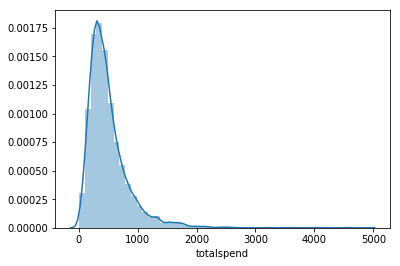

In [38]:
sns.distplot(target)
plt.show()

The log transformation is applied to make it normal distribution.

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


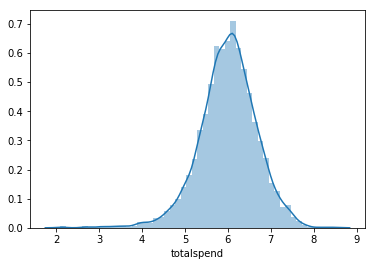

In [39]:
target = np.log(target)
sns.distplot(target)
plt.show()

Remove duplicate features which are log of other features.

In [40]:
feature = feature.drop(columns=['lninc','lncreddebt','lnothdebt','lnlongmon','lnlongten','lntollmon','lntollten','lnequipmon',
                     'lnequipten','lncardmon','lncardten','lnwiremon','lnwireten'])

Remove the categorical features which are continous variables.

In [41]:
feature = feature.drop(columns=['agecat','edcat','employ','address','cardtenure','card2tenure'])

In [42]:
def Missing_values(x):
    x = x.fillna(x.median())
    return x

In [ ]:
num = []